### 1. Data pre-processing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
labour_force = pd.read_csv("data/14100087.csv")
labour_force.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,29376.000000,29376.000000,29376.000000,29139.000000,0.0,0.0,29376.0
mean,2014.000000,246.375000,1.875000,632.856042,NaN,NaN,1.0
std,4.899063,3.388918,1.452393,1857.255140,NaN,NaN,0.0
min,2006.000000,242.000000,0.000000,1.500000,NaN,NaN,1.0
25%,2010.000000,242.000000,0.000000,30.100000,NaN,NaN,1.0
50%,2014.000000,249.000000,3.000000,77.400000,NaN,NaN,1.0
75%,2018.000000,249.000000,3.000000,338.550000,NaN,NaN,1.0
max,2022.000000,249.000000,3.000000,31772.100000,NaN,NaN,1.0


In [3]:
labour_force.head(3)

,REF_DATE,GEO,DGUID,Immigrant status,Educational attainment,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006,Canada,2016A000011124,Total population,"Total, all education levels",Population,Both sexes,15 years and over,Persons,249,thousands,3,v53074760,1.1.1.1.1.1,26121.7,NaN,NaN,NaN,1
1,2006,Canada,2016A000011124,Total population,"Total, all education levels",Population,Both sexes,25 to 54 years,Persons,249,thousands,3,v53074761,1.1.1.1.1.2,14115.7,NaN,NaN,NaN,1
2,2006,Canada,2016A000011124,Total population,"Total, all education levels",Population,Males,15 years and over,Persons,249,thousands,3,v53074762,1.1.1.1.2.1,12854.2,NaN,NaN,NaN,1


Let's drop items we don't need at tis point

In [4]:
print(labour_force['SCALAR_FACTOR'].unique()) # Rates are in units percentage and people in thousands

labour_force = labour_force.drop(columns=['GEO', 'DGUID','UOM', 'UOM_ID','SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL',
                  'TERMINATED', 'DECIMALS'], axis=1, errors='ignore')
labour_force.head()

['thousands' 'units']


,REF_DATE,Immigrant status,Educational attainment,Labour force characteristics,Sex,Age group,VALUE
0,2006,Total population,"Total, all education levels",Population,Both sexes,15 years and over,26121.7
1,2006,Total population,"Total, all education levels",Population,Both sexes,25 to 54 years,14115.7
2,2006,Total population,"Total, all education levels",Population,Males,15 years and over,12854.2
3,2006,Total population,"Total, all education levels",Population,Males,25 to 54 years,7050.8
4,2006,Total population,"Total, all education levels",Population,Females,15 years and over,13267.6


In [5]:
# let's set index to date to avoid reseting every time 
labour_force.set_index('REF_DATE', inplace=True)

#### We can explore all the components in "Immigrant status", "Educational attainment" and "Labour force characteristics" and create new columns based on those components. 

In [6]:
print("Immigrants Status: ",labour_force["Immigrant status"].unique())
print("Educational attainment", labour_force["Educational attainment"].unique())
print("Labour force characteristics",labour_force["Labour force characteristics"].unique())

Immigrants Status:  ['Total population' 'Landed immigrants'
 'Immigrants, landed 5 or less years earlier'
 'Immigrants, landed more than 5 to 10 years earlier'
 'Immigrants, landed more than 10 years earlier' 'Born in Canada']
Educational attainment ['Total, all education levels' 'No degree, certificate or diploma'
 'High school graduate' 'High school graduate, some post-secondary'
 'Post-secondary certificate or diploma' 'University degree']
Labour force characteristics ['Population' 'Labour force' 'Employment' 'Unemployment'
 'Not in labour force' 'Unemployment rate' 'Participation rate'
 'Employment rate']


#### We can goup the data by labour force Characteristics and create new columns from those 

In [7]:
# We set up the first labour force characteristic. We don't need data from the entire population here
df_labour_force = labour_force.loc[labour_force["Labour force characteristics"] == 'Labour force']
df_labour_force = df_labour_force.rename(columns={'VALUE':'Labour force'})

# update characteristics
characteristics = ['Employment','Unemployment','Not in labour force','Unemployment rate','Participation rate',
                   'Employment rate']
columns1 = ['Employed','Unemployed','Not in labour force','Unemployment rate(%)','Participation rate(%)',
            'Employment rate(%)']

for item, col in zip(characteristics, columns1):
    df_labour_force[col] = labour_force.loc[labour_force["Labour force characteristics"] == item]['VALUE']
    
df_labour_force = df_labour_force.drop("Labour force characteristics", axis=1)
df_labour_force.head()

,Immigrant status,Educational attainment,Sex,Age group,Labour force,Employed,Unemployed,Not in labour force,Unemployment rate(%),Participation rate(%),Employment rate(%)
REF_DATE,,,,,,,,,,,
2006,Total population,"Total, all education levels",Both sexes,15 years and over,17551.7,16413.7,1137.9,8570.1,6.5,67.2,62.8
2006,Total population,"Total, all education levels",Both sexes,25 to 54 years,12182.2,11513.3,668.9,1933.5,5.5,86.3,81.6
2006,Total population,"Total, all education levels",Males,15 years and over,9341.3,8712.6,628.7,3512.9,6.7,72.7,67.8
2006,Total population,"Total, all education levels",Males,25 to 54 years,6442.6,6081.8,360.7,608.2,5.6,91.4,86.3
2006,Total population,"Total, all education levels",Females,15 years and over,8210.4,7701.2,509.2,5057.2,6.2,61.9,58.0


   ### Labour force in Thousands by immigration status for individuals older than 25 years from 2012 to 2022
   Note: A landed immigrant is a person who has been granted the right to live in Canada permanently by immigration authorities

In [8]:
by_age_gender = df_labour_force.loc[(df_labour_force['Sex']=='Both sexes') & 
                                    (df_labour_force['Age group']=='25 to 54 years') ]

lf = pd.pivot_table(by_age_gender, values='Labour force', index=['REF_DATE'], 
                                       columns=['Immigrant status'])

lf.head()

Immigrant status,Born in Canada,"Immigrants, landed 5 or less years earlier","Immigrants, landed more than 10 years earlier","Immigrants, landed more than 5 to 10 years earlier",Landed immigrants,Total population
REF_DATE,,,,,,
2006,3146.516667,144.583333,542.633333,157.850000,845.116667,4060.733333
2007,3163.033333,146.350000,560.766667,158.316667,865.400000,4093.633333
2008,3181.550000,161.366667,547.466667,163.600000,872.416667,4122.500000
2009,3183.333333,156.733333,553.266667,171.466667,881.466667,4140.833333
2010,3180.750000,165.016667,557.300000,175.566667,897.850000,4156.000000


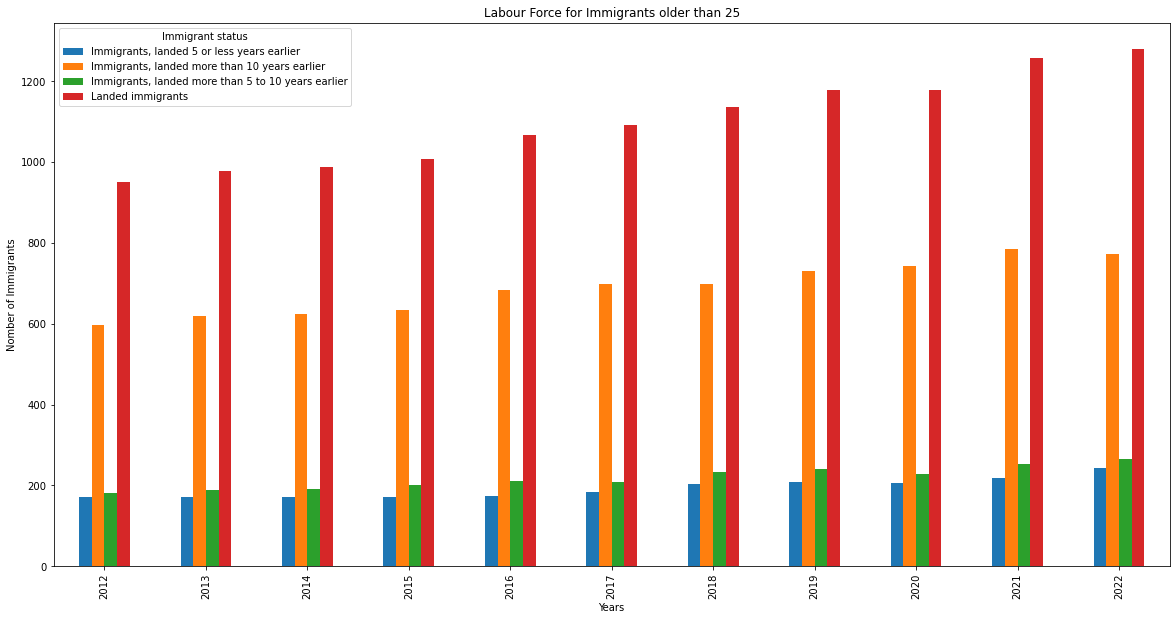

In [9]:
# In case we want to drop the total population and individuals born in Canada
lf = lf.drop(['Total population', 'Born in Canada'], axis=1)

lf.loc[2012:2022].plot(kind='bar',stacked=False,figsize=(20, 10))

plt.title('Labour Force for Immigrants older than 25')
plt.ylabel('Nomber of Immigrants')
plt.xlabel('Years')

plt.show()

Observations: It will take about 10 years for an immigrant to permanently intergrate the labour force.

### Employment rate by education for the total population 

In [10]:
employment_rate = by_age_gender.loc[by_age_gender['Immigrant status'] == 'Total population']
employment_rate_pivot = pd.pivot_table(employment_rate, values="Employment rate(%)", index='REF_DATE', 
                                    columns='Educational attainment')
employment_rate_pivot.head(3)

Educational attainment,High school graduate,"High school graduate, some post-secondary","No degree, certificate or diploma",Post-secondary certificate or diploma,"Total, all education levels",University degree
REF_DATE,,,,,,
2006,79.4,79.5,64.3,85.7,81.6,86.7
2007,80.1,79.4,64.4,86.0,82.0,86.7
2008,79.7,80.2,64.5,86.3,82.1,86.3


Text(0.5, 0, 'Years')

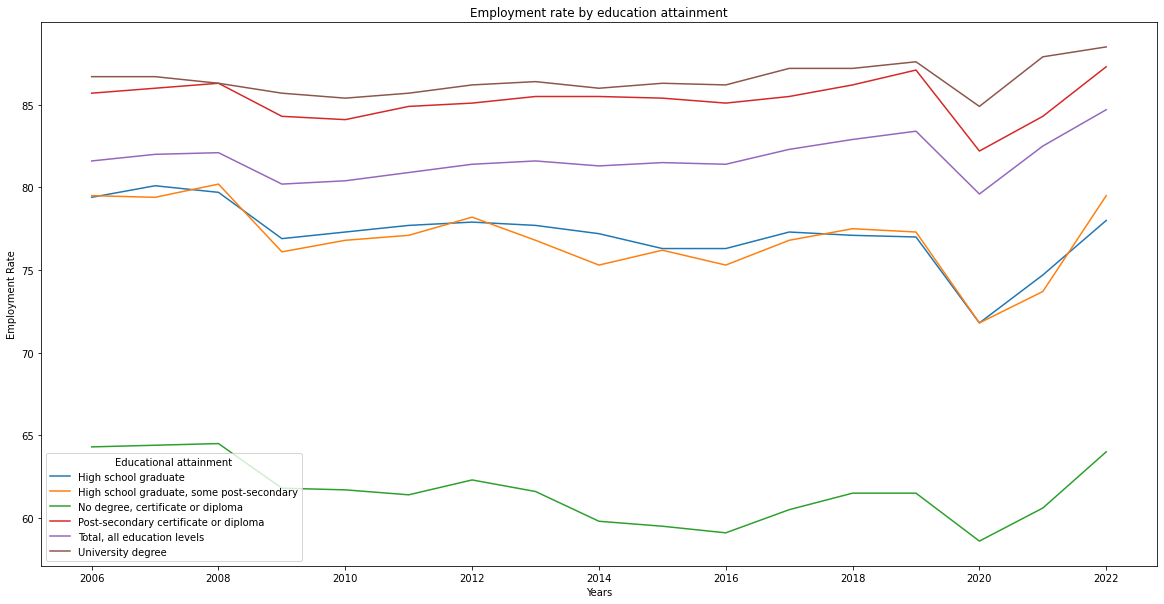

In [12]:
ax = employment_rate_pivot.plot(kind='line', figsize=(20, 10))

ax.set_title('Employment rate by education attainment')
ax.set_ylabel('Employment Rate')
ax.set_xlabel('Years')
